This Notebook demonstrates how to use the functions in `../utils`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os

import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family': 'Arial', 'font.size':11})

sys.path.append('../src')
import shtools
import constants
import icgem

home_dir = os.getcwd()
data_dir = os.path.join(home_dir, 'data')

# Download and read spherical harmonic coefficients (ICGEM format)

The function `read_shc` in `../utils/shtools` can be used to read certain attributes from a `.gfc` file downloaded from [ICGEM](https://icgem.gfz-potsdam.de/tom_longtime). 

In [3]:
model = 'GO_CONS_GCF_2_TIM_R6e'
icgem.download_ggm(model_name=model)

fname = 'downloads/' + model + '.gfc'

shc = icgem.read_icgem(fname)
print(f'\nData type of shc: {type(shc)}')

Cannot verify completeness of GO_CONS_GCF_2_TIM_R6e.gfc due to connectivity issues. Using the existing file.


Data type of shc: <class 'dict'>


`read_shc` returns a dict, which contains:

<pre>
- 'a'       : The reference radius.
- 'nmax'    : The maximum degree of expansion.
- 'GM'      : The Earth's gravitational constant.
- 'Cnm'     : A numpy array containing the cosine coefficients.
- 'Snm'     : A numpy array containing the sine coefficients.
- 'sCnm'    : A numpy array containing the formal cosine errors.
- 'sSnm'    : A numpy array containing the formal sine errors.
- 'tide_sys': The tide system used in the model.
</pre>

We can print out radius, nmax, GM, and tide system and compare with the values in `model` (open the .gfc file in a text editor to see these values). For reference, the values in the `.gfc` file are:

<pre>
- radius                 (a)          : 6378136.46
- max_degree             (nmax)       : 300
- earth_gravity_constant (GM)         : 3.986004415E+14
- tide_system            (tide_sys)   : zero_tide
</pre>


In [4]:
for key in ['a', 'nmax', 'GM', 'tide_sys']:
    print(f'{key:<10}: {shc[key]}')

a         : 6378136.46
nmax      : 300
GM        : 398600441500000.0
tide_sys  : zero_tide


# Degree Variances

Constants from the global geopotential model

In [5]:
variances = shtools.degree_amplitude(shc, ellipsoid='grs80')

In [6]:
variances.keys()

dict_keys(['geoid', 'anomaly', 'error_geoid', 'error_anomaly', 'degree'])

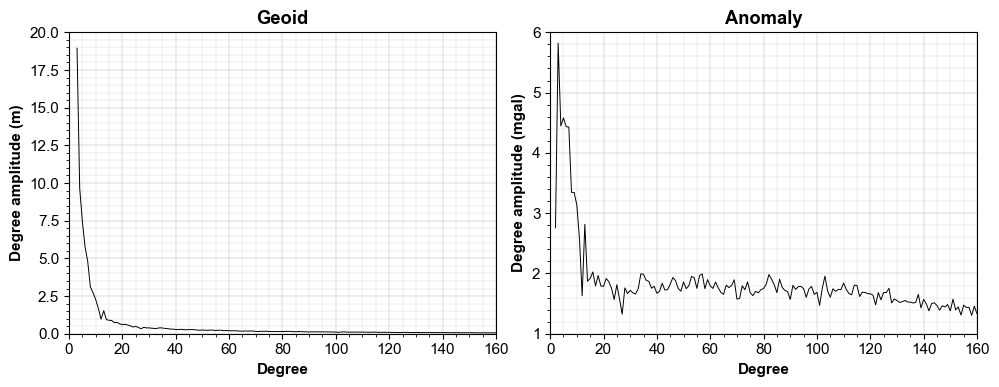

In [7]:
fig, axs = plt.subplots(1,2, figsize=(10,4))

axs = axs.ravel()

axs[0].plot(variances['degree'][3:], variances['geoid'][3:], linewidth=0.7, color='k')
axs[1].plot(variances['degree'][2:], variances['anomaly'][2:], linewidth=0.7, color='k')
# axs[2].plot(variances['degree'][3:], variances['error_geoid'][3:], linewidth=0.7, color='k')
# axs[3].plot(variances['degree'][2:], variances['error_anomaly'][2:], linewidth=0.7, color='k')

titles = ['Geoid', 'Anomaly', 'Geoid error', 'Anomaly error']
ylabels = ['Degree amplitude (m)', 'Degree amplitude (mgal)'] #, 'Degree amplitude (m)', 'Degree amplitude (mgal)']
xlims  = [0, 160]
ylims  = [[0, 20], [1, 6]]

for i, (ax, title) in enumerate(zip(axs, titles)):
    ax.set_title(title, fontweight='bold')
    ax.set_xlabel('Degree', fontweight='bold')
    ax.set_ylabel(ylabels[i], fontweight='bold')
    ax.set_xlim(xlims)
    
    if i in [0,1]:
        ax.set_ylim(ylims[i])
    # ax.grid(linewidth=0.2)
    

    # Customize the appearance of the minor gridlines
    ax.grid(which='both', linewidth=0.2, color='gray')
    ax.minorticks_on()
    ax.grid(which='minor', color='gray', linewidth=0.1)

    
plt.tight_layout()
plt.show()

# Reference Geoid

In [9]:
import coordinates as co

In [12]:
co.geodetic2geocentric(80)

79.93397880982552

In [18]:
import gravity

In [21]:
gravity.normal_gravity(0)

9.7803253359